# lab6 confidence intervals

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (8,6)

## stepup
for LHC data, Background -- Poisson background with mean 100

In [2]:
# simulate a fake Poisson distribution
bkgd = stats.poisson.rvs(mu=100,size=100000)

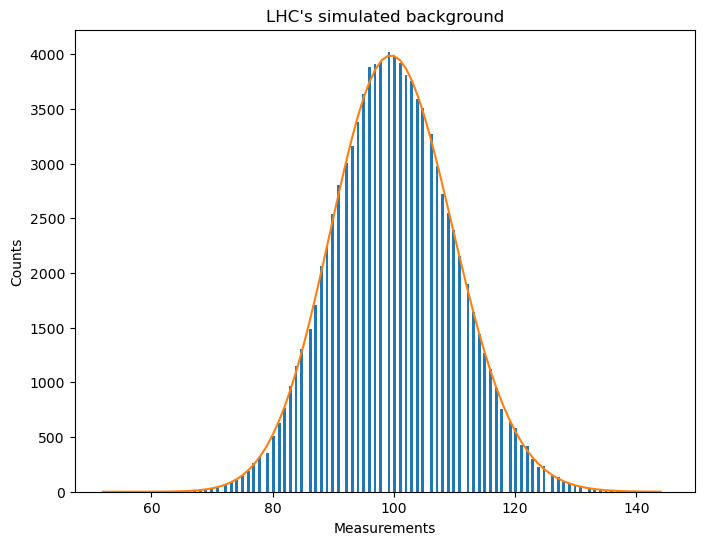

In [3]:
# a brief plot of histogram and equation
plt.hist(bkgd, bins=200)
x = np.arange(bkgd.min(), bkgd.max())
plt.plot(x, 100000*stats.poisson.pmf(x, 100))
plt.xlabel("Measurements")
plt.ylabel("Counts")
plt.title("LHC's simulated background");

## problem 1
look at the distribution and determin where the 5 $\sigma$ sensitivity threshold is

From the plot above, we can find out there will be two values on both sides of mean.<br />
First, we need find the probability of more than 5$\sigma$. And then find two according thresholds. 

In [4]:
prob = stats.norm.sf(5)

threshold1 = stats.poisson.isf(prob, 100)
threshold2 = stats.poisson.ppf(prob, 100)
print(threshold1)
print(threshold2)

154.0
54.0


Hence, we find out that <br /> 
the upper threshold of 5$\sigma$ is 154.0,
and the lower threshold of 5$\sigma$ is 54.0.

## problem 2
inject strong signal, chosen the 8$\sigma$

In [5]:
# first, find the upper threshold of 8 sigma
prob2 = stats.norm.sf(8)
threshold3 = stats.poisson.isf(prob2, 100)
threshold3

190.0

In [6]:
# then inject signal @ 8 sigma into background data 250 times
observed_signal = bkgd.copy()

for times in range(4000):
    observed_signal = np.append(observed_signal, threshold3 + stats.poisson.rvs(100))

In [7]:
len(observed_signal)

104000

### a) 

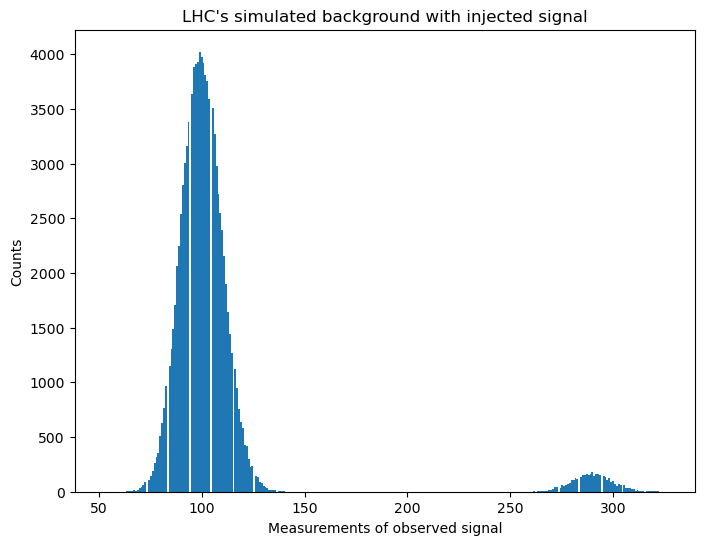

In [8]:
plt.hist(observed_signal, bins=300)
plt.xlabel("Measurements of observed signal")
plt.ylabel("Counts")
plt.title("LHC's simulated background with injected signal");

The shape of Histogram is close to two Guassian distributions, respectively one is around the 100, and another is around the 290. The distribution at the left is original background, and the distribution at the right is the injected signal, which is much stronger than the background noise. Meanwhile, the signal itself is around the mean of 190. And with adding the background, what we actually observed is around the mean of 290.

### b) 

In [9]:
#first find the mean of the observed signal
print(np.mean(observed_signal))

107.31207692307693


The mean of the observed signal is about 107, while the true injected signal is 190. Hence, the observed value is weaker than the true injected signal. Then, the observed signal is biased. Becase the number of injected signal is limited, which is much smaller than the background number. <br />
Meanwhile, we find the whole distribution is not symmetrical. However, the distribution of observed signal will close to the distribution when the number of injected signal is close to the number of background.

## problem 3

Now make a suite of injected signals, the maximun of the signal is 400. And then repeat the similar process shown in problem 2, we will inject signal many times.

In [10]:
size = 1000
max_signal = 400
obs_signals = np.zeros(size*size)
inj_signals = np.zeros(size*size)
for index in range(size):
    signal = (max_signal / size) * index
    for times in range(size):
        inj_signals[index*size + times] = signal
        obs_signals[index*size + times] = stats.poisson.rvs(mu=100) + signal

In [11]:
print(len(inj_signals))
print(len(obs_signals))

1000000
1000000


#### a) 

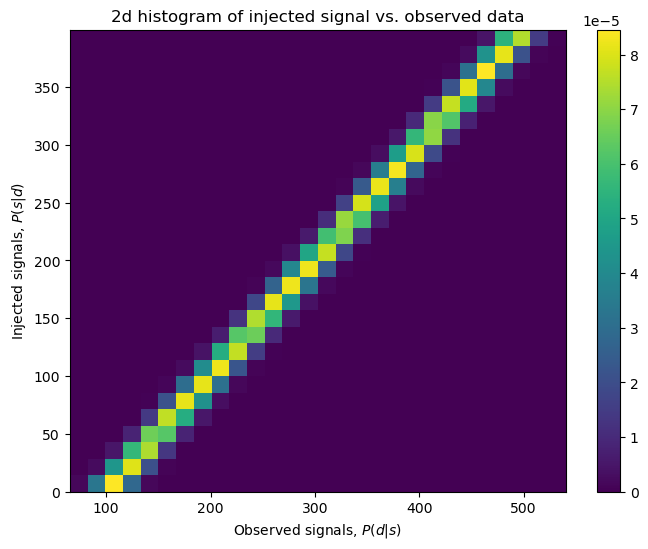

In [12]:
# make a 2d histogram of injected signal vs. observed data
h = plt.hist2d(obs_signals, inj_signals, bins=(28,28), density=True);
plt.xlabel('Observed signals, $P(d|s)$')
plt.ylabel('Injected signals, $P(s|d)$')
plt.title('2d histogram of injected signal vs. observed data')
plt.colorbar()
plt.show()

#### b) 

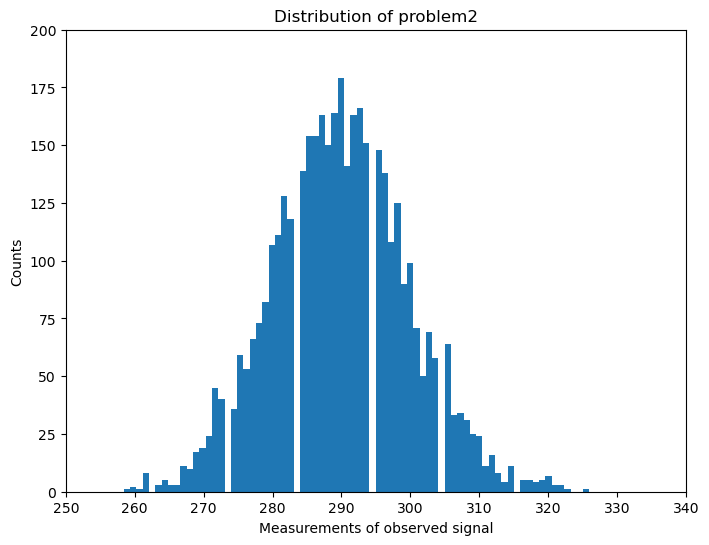

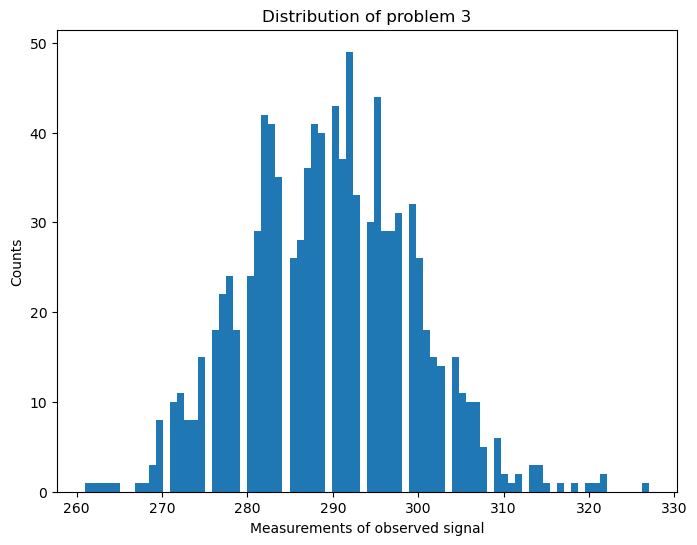

In [13]:
# choose the 190 injected signal power, same as problem 2
dist = []
for index in range(inj_signals.size):
    if inj_signals[index] == 190: #select targeted signal
        dist.append(obs_signals[index])
#only draw the observed signal in problem 2
plt.hist(observed_signal, bins = 300)
plt.xlim(250,340)
plt.ylim(0,200)
plt.xlabel("Measurements of observed signal")
plt.ylabel("Counts")
plt.title("Distribution of problem2");
plt.show()
# draw the selected signal in problem 3
plt.hist(dist, bins=80)
plt.xlabel("Measurements of observed signal")
plt.ylabel("Counts")
plt.title("Distribution of problem 3");

Compare with two plots above, we get the same answer for porblem 2 and 3. This action is like a horinzontal slice of 2D histogram with fixed true signal value.

#### c) 
choice: select the obsered data value equals to 300

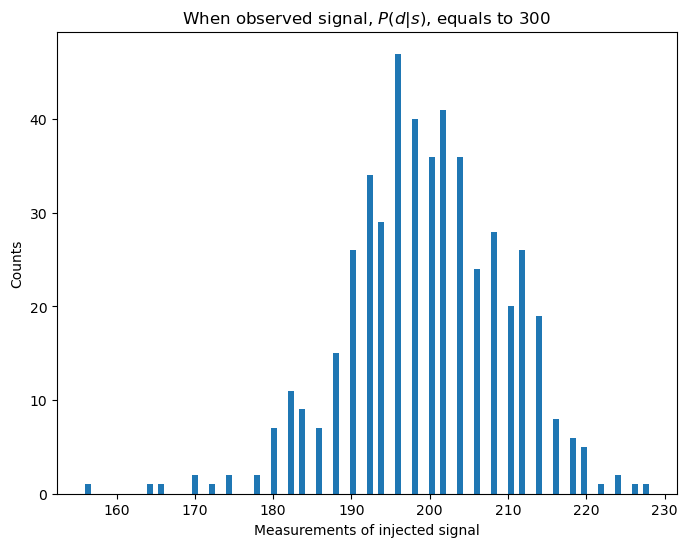

In [14]:
#1D histogram of the true signal probability
dist2 = []

for index in range(obs_signals.size):
    if obs_signals[index] == 300:
        dist2.append(inj_signals[index])
plt.hist(dist2, bins = 100)
plt.xlabel("Measurements of injected signal")
plt.ylabel("Counts")
plt.title("When observed signal, $P(d|s)$, equals to 300");
plt.show()

Comment on the meaning of the histogram: the histogram shows the vertical slice of 2D histogram. When we have a fixed observed signal value, then we will find the distribution of the true signal value from the histogram we just draw.

#### d) 

In [15]:
print('For my observed signal 300, the 1σ uncertainty')
print('on the true signal strength is {:.2f}.'.format(np.std(dist2)))  

For my observed signal 300, the 1σ uncertainty
on the true signal strength is 10.12.


##### e)

In [16]:
np.mean(dist2)

199.59100204498978

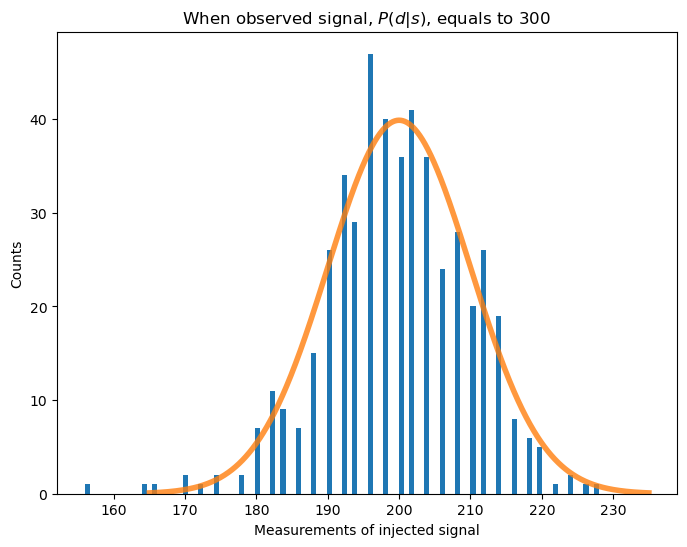

In [17]:
plt.hist(dist2, bins = 100)
plt.xlabel("Measurements of injected signal")
plt.ylabel("Counts")
plt.title("When observed signal, $P(d|s)$, equals to 300");
x = np.linspace(165,235,1000)
plt.plot(x,stats.norm.pdf(x,loc = 200., scale = 10)*1000,linewidth = 4,alpha = 0.8)
plt.show()

-- for the symmetry: yes, very close to symmetry but with a little left-skewed.

-- for the biased: yes, because the observed value stronger than the true injected signal.

-- In conclusion: it does make sense, because the background is the Poisson distribution, it is symmetric for itself. Then, with the central limit theorem, the observed distribution will close to the Guassian distribution, which is close to symmetric distribution. 